<img src="https://comet.ml/images/logo_comet_light.png" width="200px"/>

# Comet.ml REST API

Comet.ml has an extensive interface to all of your data using a [REST API](https://en.wikipedia.org/wiki/Representational_state_transfer) through [Comet.ml endpoints](https://www.comet.ml/docs/rest-api/endpoints/). Now, you can access this information easily through the Comet.ml Python SDK. Requires version comet_ml version 1.0.40 or greater.

## Setup

To run the following experiments, you'll need to set your COMET_API_KEY and COMET_REST_API_KEY. The easiest way to to this is to set the values in a cell like this:

```python
%%writefile .env
COMET_API_KEY="..."
COMET_REST_API_KEY=".."
```
where you replace the ...'s with your keys.

You can get your COMET_API_KEY under your quickstart link (replace YOURID with your Comet.ml ID):

https://www.comet.ml/YOURID/quickstart

You can get your COMET_REST_API_KEY under your settings (replace YOURID with your Comet.ml ID):

https://www.comet.ml/YOURID/settings/account

## Quick Overview

To access the REST API through the comet.ml SDK, you will need to make an API() instance. First, we import the API class, and other libraries we will need:

In [1]:
from comet_ml import API

import matplotlib.pyplot as plt
%matplotlib inline

and creat the API instance:

In [2]:
api = API()

Using the `api` instance, you can get the name of your workspaces:

In [3]:
api.workspaces

['dsblank']

If you reference your workspace by name from api.workspaces, you'll see your projects:

In [4]:
api.workspaces["dsblank"]

['pytorch', 'mnist-001', 'visualizations', 'testing', 'pypy', 'tensorflow', 'chainer', 'mnist-014', 'optimizer', 'general', 'jupyter-experiments', 'keras', 'fastai']

Or, get the projects from another user's workspace:

In [5]:
api.workspaces["cometpublic"]

['fasttext', 'comet-notebooks', 'parameter-space-exploration', 'home-credit']

Using the same method, you can refer to a project by name:

In [6]:
api.workspaces["dsblank"]["keras"]

['5dc346a883964bd2b8864c40940fd864', '351afa6e498f452ca743c19d3e131767', '72b89ab961cd42db91535026687f86fb', 'd5d3cf989efd4b5f8841bd64fee5f817', '12ab8382de254a9bb678bf3d6131e255', '51cf6e588a3346cdb560fd0c09d49610']

Or, using the slash delimiter:

In [7]:
api.workspaces["dsblank/keras"]

['5dc346a883964bd2b8864c40940fd864', '351afa6e498f452ca743c19d3e131767', '72b89ab961cd42db91535026687f86fb', 'd5d3cf989efd4b5f8841bd64fee5f817', '12ab8382de254a9bb678bf3d6131e255', '51cf6e588a3346cdb560fd0c09d49610']

And one more level, get the details of an experiment:

In [8]:
api.workspaces["dsblank"]["keras"]['51cf6e588a3346cdb560fd0c09d49610']

<Experiment 'dsblank/keras/51cf6e588a3346cdb560fd0c09d49610'>

Or, again using the slash shorthand:

In [9]:
api.workspaces["dsblank/keras/51cf6e588a3346cdb560fd0c09d49610"]

<Experiment 'dsblank/keras/51cf6e588a3346cdb560fd0c09d49610'>

Let's get the experiment and save it to a variable named `exp`:

In [10]:
exp = api.workspaces["cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20"]

In [11]:
exp

<Experiment 'cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20'>

There are a number of items you get from the Experiment:

In [12]:
help(exp)

Help on Experiment in module comet_ml.api object:

class Experiment(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, api, workspace, project, experiment_key)
 |      REST API Experiment interface.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  display(self, clear=False, wait=True, new=0, autoraise=True)
 |      Show the comet.ml experiment page in an IFrame in a
 |      Jupyter notebook or Jupyter lab, OR open a browser
 |      window or tab.
 |      
 |      For Jupyter environments:
 |      
 |      Args:
 |          clear: to clear the output area, use clear=True
 |          wait: to wait for the next displayed item, use
 |                wait=True (cuts down on flashing)
 |      
 |      For non-Jupyter environments:
 |      
 |      Args:
 |          new: open a new browser window if new=1, otherwise re-use
 |               existing window/tab
 |          autoraise: make the browser tab/window active
 |  
 |  get_asset(self, asset_id)
 |      Get an 

For example, we can explore the `other` property, which shows items saved with Experiment.log_other(NAME, VALUE):

In [13]:
exp.other

[{'name': 'Name',
  'valueMax': 'example 002',
  'valueMin': 'example 002',
  'valueCurrent': 'example 002',
  'timestampMax': 1544533427335,
  'timestampMin': 1544533427335,
  'timestampCurrent': 1544533427335}]

In this example, we see that the experiment has the `Name` "example 001". We can use `Name` to also look up experiments:

In [14]:
exp = api.workspaces["dsblank/keras/example 001"]
exp

<Experiment 'dsblank/keras/example 001'>

Perhaps one of the most useful abilities for the REST API is to access your experiment's data in order to create a variation of a plot. To access the raw metric data, use the `.metrics_raw` property of the experiment:

In [15]:
len(exp.metrics_raw)

2040

Thus, there were 2040 metrics logged during the training of this experiment. We can get the first using indexing with an integer:

In [16]:
exp.metrics_raw[0]

{'metricName': 'acc',
 'metricValue': '0.09166666865348816',
 'timestamp': 1542738532966,
 'step': 1,
 'runContext': None,
 'offset': 21}

That shows that the "acc" (accuracy) metric had a value of about 0.09 at step 1 of the experiment.

We can also use a string as an index to query all of the dictionaries in `metrics_raw` to only give those values at each step, like so:

In [17]:
acc_metrics = exp.metrics_raw["acc"]

In [18]:
len(acc_metrics)

510

In [19]:
acc_metrics[0]

(1, 0.09166666865348816)

Therefore, `exp.metrics_raw["acc"]` gives us (step, value) for all "acc" items. We can then easily use Python's built in zip and matplotlib to plot these values:

In [20]:
steps, acc = zip(*acc_metrics)

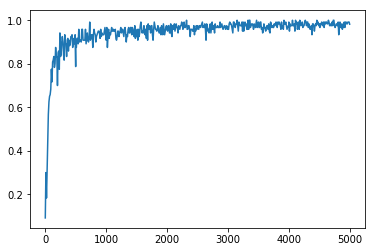

In [21]:
plt.plot(steps, acc);

That's it for a quick overview. Now let's look in detail at each component, and introduce the low-level REST API as well.

## Workspaces

By default, api.workspaces reports only your workspace names:

In [22]:
api.workspaces

['dsblank']

You can also interate over those names:

In [23]:
for workspace in api.workspaces:
    print(workspace)

dsblank


As we saw above, you can also access other public workspaces as well:

In [24]:
api.workspaces["cometpublic"]

['fasttext', 'comet-notebooks', 'parameter-space-exploration', 'home-credit']

## Projects

Under the workspace, you'll find the projects:

In [25]:
api.workspaces["cometpublic"]

['fasttext', 'comet-notebooks', 'parameter-space-exploration', 'home-credit']

In [26]:
project = api.workspaces["cometpublic"]["comet-notebooks"]
## OR:
#project = api.workspaces["cometpublic/comet-notebooks"]

If you just print out, or iterate over a project, you get access to the experiment ids:

In [27]:
project

['7092a5e4c362453fb0b3f06785a1d30c', 'example 002']

In [28]:
project[0].experiment_key

'7092a5e4c362453fb0b3f06785a1d30c'

In [29]:
project[1].experiment_key

'd21f94a1c71841d2961da1e6ddb5ab20'

However, you can also access all of the project data via the `.data` property:

In [30]:
project.data

{'project_id': '63776506878949eb9ac225a2a24b87f6',
 'user_name': 'cometpublic',
 'project_name': 'comet-notebooks',
 'project_desc': '',
 'team_id': 'cometpublic-default',
 'is_owner': False,
 'is_public': True,
 'is_shared': False,
 'num_of_experiments': 2,
 'last_updated': 1544533464653,
 'team_name': 'cometpublic',
 'experiments': {'7092a5e4c362453fb0b3f06785a1d30c': {'code_sha': '0193bacf',
   'file_name': 'Jupyter interactive',
   'file_path': 'Jupyter interactive',
   'duration_millis': 123000,
   'start_server_timestamp': 1542824533698,
   'end_server_timestamp': 1542824657041,
   'has_images': True,
   'experiment_key': '7092a5e4c362453fb0b3f06785a1d30c',
   'is_key': True},
  'd21f94a1c71841d2961da1e6ddb5ab20': {'code_sha': '66e8551f',
   'file_name': 'Jupyter interactive',
   'file_path': 'Jupyter interactive',
   'duration_millis': 1709771000,
   'start_server_timestamp': 1542823692825,
   'end_server_timestamp': 1544533464652,
   'has_images': False,
   'experiment_key': 'd

And that's everything there is to a project object:

In [31]:
help(project)

Help on Experiments in module comet_ml.api object:

class Experiments(builtins.object)
 |  Methods defined here:
 |  
 |  __getitem__(self, item)
 |  
 |  __init__(self, api, workspace, project)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |  
 |  __len__(self)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  data
 |      The project data in JSON format.



## Experiments

Continuing with the dictionary-like access, you can see and iterate over the experiment ids:

In [32]:
api.workspaces["cometpublic"]["comet-notebooks"]

['7092a5e4c362453fb0b3f06785a1d30c', 'example 002']

In [33]:
exp = api.workspaces["cometpublic"]["comet-notebooks"]['d21f94a1c71841d2961da1e6ddb5ab20']
## OR
# exp = api.workspaces["cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20"]

### Regular Expression Experiment Name Matching

You can also use regular expressions as the name for the experiment:

In [34]:
api.workspaces["cometpublic"]["comet-notebooks"]["example.*"]

[<Experiment 'cometpublic/comet-notebooks/example 002'>]

### Experiment Properties

Experiments also have a `.data` property:

In [35]:
exp.data

{'code_sha': '66e8551f',
 'file_name': 'Jupyter interactive',
 'file_path': 'Jupyter interactive',
 'duration_millis': 1709771000,
 'start_server_timestamp': 1542823692825,
 'end_server_timestamp': 1544533464652,
 'has_images': False,
 'experiment_key': 'd21f94a1c71841d2961da1e6ddb5ab20',
 'is_key': True,
 '_other': [{'name': 'Name',
   'valueMax': 'example 002',
   'valueMin': 'example 002',
   'valueCurrent': 'example 002',
   'timestampMax': 1544533427335,
   'timestampMin': 1544533427335,
   'timestampCurrent': 1544533427335}],
 'other': ['Name'],
 '_name': 'example 002',
 'metrics': ['train_accuracy',
  'train_curr_epoch',
  'train_loss',
  'train_val_loss'],
 'parameters': ['f']}

In this brief dictionary representation, you will see that `other`, `metrics` and `parameters` give a list of names. However, as we saw above, you can get more information through properties of those same names:

names through exp.data["properties"] and more detail at exp.properties:

In [36]:
exp.parameters[0]

{'name': 'f',
 'valueMax': '/run/user/1000/jupyter/kernel-b1c4403c-c673-4e7f-90dc-853616d231e2.json',
 'valueMin': '/run/user/1000/jupyter/kernel-b1c4403c-c673-4e7f-90dc-853616d231e2.json',
 'valueCurrent': '/run/user/1000/jupyter/kernel-b1c4403c-c673-4e7f-90dc-853616d231e2.json',
 'timestampMax': 1542823692798,
 'timestampMin': 1542823692798,
 'timestampCurrent': 1542823692798}

names through exp.data["other"] and more detail at exp.other:

In [37]:
exp.other[0]["name"], exp.other[0]["valueCurrent"]

('Name', 'example 002')

names through exp.data["metrics"] and more detail at exp.metrics:

In [38]:
exp.metrics

[{'name': 'train_accuracy',
  'valueMax': '0.0',
  'valueMin': '0.0',
  'valueCurrent': '0.0',
  'timestampMax': 1542823699380,
  'timestampMin': 1542823699380,
  'timestampCurrent': 1542823704609,
  'runContextMax': 'train',
  'runContextMin': 'train',
  'runContextCurrent': 'train',
  'stepMax': 1,
  'stepMin': 1,
  'stepCurrent': 3},
 {'name': 'train_curr_epoch',
  'valueMax': '1.0',
  'valueMin': '0.0',
  'valueCurrent': '1.0',
  'timestampMax': 1542823693885,
  'timestampMin': 1542823693885,
  'timestampCurrent': 1542823699380,
  'runContextMax': 'train',
  'runContextMin': 'train',
  'runContextCurrent': 'train'},
 {'name': 'train_loss',
  'valueMax': '2.3872790336608887',
  'valueMin': '2.3872790336608887',
  'valueCurrent': '2.3872790336608887',
  'timestampMax': 1542823695820,
  'timestampMin': 1542823695820,
  'timestampCurrent': 1542823695820,
  'runContextMax': 'train',
  'runContextMin': 'train',
  'runContextCurrent': 'train',
  'stepMax': 0,
  'stepMin': 0,
  'stepCurren

You can see all of the methods and propeties on an experiment instance:

In [39]:
help(exp)

Help on Experiment in module comet_ml.api object:

class Experiment(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, api, workspace, project, experiment_key)
 |      REST API Experiment interface.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  display(self, clear=False, wait=True, new=0, autoraise=True)
 |      Show the comet.ml experiment page in an IFrame in a
 |      Jupyter notebook or Jupyter lab, OR open a browser
 |      window or tab.
 |      
 |      For Jupyter environments:
 |      
 |      Args:
 |          clear: to clear the output area, use clear=True
 |          wait: to wait for the next displayed item, use
 |                wait=True (cuts down on flashing)
 |      
 |      For non-Jupyter environments:
 |      
 |      Args:
 |          new: open a new browser window if new=1, otherwise re-use
 |               existing window/tab
 |          autoraise: make the browser tab/window active
 |  
 |  get_asset(self, asset_id)
 |      Get an 

For example, just like when creating and logging data, you can also use the `.display()` method to show the Comet.ml page for that experiment right in the notebook:

In [40]:
exp._get_experiment_url()

'https://www.comet.ml/cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20'

In [41]:
exp.display()

You can get an existing experiment:

In [42]:
e = api.workspaces["dsblank"]["chainer"]["596d91ae1dbc420c9b13a3ced858de3c"]
ee = e.existing_experiment

COMET INFO: old comet version (1.0.38) detected. current: 1.0.39 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/dsblank/chainer/596d91ae1dbc420c9b13a3ced858de3c



You can make changes to the saved data using the existing experiment:

https://www.comet.ml/docs/python-sdk/ExistingExperiment/

In [43]:
ee.end()

COMET INFO: Uploading stats to Comet before program termination (may take several seconds)
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/dsblank/chainer/596d91ae1dbc420c9b13a3ced858de3c



### Examples

Comet.ml is working on a query API which will allow highly effcient queries of your data. However, you can also write your own query of sorts.

Here is some code that prints out the names of experiments that have associated HTML (this can take a long time if you have many experiments):

In [44]:
%%time
for workspace in api.workspaces:
    print("processing workspace", workspace, "...")
    for project in api.workspaces[workspace]:
        print("    processing project", project, "...")
        for exp_id in api.workspaces[workspace][project]:
            print("       processing experiment", exp_id, "...")
            exp = api.workspaces[workspace][project][exp_id]
            if exp.html != None:
                print("found html!")

processing workspace dsblank ...
    processing project pytorch ...
       processing experiment 5f540fc7894146f4bbfd21ebe8549fcf ...
       processing experiment 1ae244a0423b477b836923084f685b0e ...
       processing experiment fa83f339da024d1da838ef6f21bc74ff ...
       processing experiment cd19c6d3941e42c1bc939782605b4156 ...
       processing experiment 296cc381115a4112984de013e27ae829 ...
       processing experiment 62d69106941d4cca92981d38e0db3013 ...
       processing experiment 76e370a24dee41d083755a250ef00ddc ...
       processing experiment 8b65b7e9d70a4663a0ee0fbc0adfab02 ...
       processing experiment 86a3e405c5484ea59e5472b62e2166f4 ...
       processing experiment 3a8ff37b0e7846d4a90fdf9e0170dc48 ...
       processing experiment 536beec2348849508c6096ab2e56731b ...
       processing experiment f920b50cab83443caca71d941bb1e98f ...
       processing experiment 40b8cc51ff6a43d98e31e5cb4e987f25 ...
       processing experiment 0f2fcba7176143a1a7cffd3d40557a21 ...
       p

       processing experiment 64e2f5ba026b441788ab4bf0dc32fd9b ...
       processing experiment ffdb848447a94d5d8d2c567d31113b22 ...
       processing experiment d5fa87cc396446708100ccf730b40763 ...
       processing experiment 0613f07998c14f7683ae58c94c714b65 ...
       processing experiment 1a43d7b0d8c34082bc8b412dc27b56de ...
       processing experiment 3a35488040d140c18193af8535dde31e ...
       processing experiment 0ccad805f527429eb8185ca53f9a27cf ...
       processing experiment d2b8807cb52448ba933c3ee43dfd68c6 ...
       processing experiment a28551a74f394e7c905cb2153a073ddc ...
       processing experiment 4caad03fdb5c454a90b3e330acef9f45 ...
       processing experiment b080161dd0a849d1aa2611f47cb97529 ...
       processing experiment ad0371eac87342f7bbf3fd0b874b1d3a ...
       processing experiment 81ae231790a340e39bfb32545f5ac974 ...
       processing experiment 045ce66a1ae74f16aae1b5544d25f758 ...
       processing experiment 3ec1076602054917b8782e147f167d33 ...
    proces

       processing experiment 97775adea4f64247bf1da6c51f7b7823 ...
       processing experiment 4d8a2ede92004a37a04336ba97af30fd ...
       processing experiment a44c9da445b941baba8fcf84df53fb02 ...
       processing experiment 2278f89561dd4d1b9fbecd12823670ad ...
       processing experiment db85d048d23049a4998a214a530b9617 ...
       processing experiment 77454b71a74c4cf98a8a0faad7639c24 ...
       processing experiment 109479625cfc498ca2f99846ba76f258 ...
       processing experiment 2b2cbdfd351c4511875f2a0797da5ac0 ...
       processing experiment 26690b701ad14289861736fb9311cc46 ...
       processing experiment 3dc0cb7f649a402d8cb019e52a96e4b0 ...
       processing experiment c3887c74d6db4181b8f866226ac79c6d ...
       processing experiment 68ccec72d5574add808eff468ddda969 ...
       processing experiment ecb97f587de948398d6f6c7b305e10c7 ...
       processing experiment 0052a7906f6949a3abdc3eccb717e9ba ...
       processing experiment 17bf8fcbe6774f41a682d9c64acb46ff ...
       pro

Here is a function that will find the first experiment that has associated images:

In [45]:
def find_image():
    for workspace in api.workspaces:
        for project in api.workspaces[workspace]:
            for exp_id in api.workspaces[workspace][project]:
                exp = api.workspaces[workspace][project][exp_id]
                if exp.images != []:
                    return exp

In [46]:
find_image()

<Experiment 'dsblank/pytorch/3b56611892b7447aa8c4486a6eeb27d0'>

Now, we get the experiment API, and explore the `.images` property:

In [47]:
api.workspaces['dsblank/pytorch/3b56611892b7447aa8c4486a6eeb27d0'].images

[{'apiKey': 'x0yluTXX4ysG4z1k0FaTAz3qj',
  'runId': 'EgBEDhAJMA6OxWXZ1dHv4AkSz',
  'experimentKey': '3b56611892b7447aa8c4486a6eeb27d0',
  'projectId': '1f1999d917104dbe8b6a17b2c28c171c',
  'figCounter': 0,
  'figName': 'Exponential Slowdown',
  'step': None,
  'runContext': None,
  'fileName': '4ykmnOHJFZkrRD36KDrTXvHJk.svg',
  'fileSize': 0,
  'imagePath': 'https://s3.amazonaws.com/comet.ml/4ykmnOHJFZkrRD36KDrTXvHJk.svg',
  'createdAt': 1542116223922}]

We can get a URL for the image, and display it in the notebook:

In [48]:
url = api.workspaces['dsblank/pytorch/3b56611892b7447aa8c4486a6eeb27d0'].images[0]["imagePath"]
url

'https://s3.amazonaws.com/comet.ml/4ykmnOHJFZkrRD36KDrTXvHJk.svg'

In [49]:
from IPython.display import Image

In [50]:
Image(url=url)

Now, let's write a short program that will find the run with the best accuracy given a workspace/project string:

In [52]:
def find_best_run(project):
    runs = []
    for exp_id in api.workspaces[project]:
        exp = api.workspaces[project][exp_id]
        accs = [x["valueMax"] for x in exp.metrics if x["name"] == "acc"]
        if len(accs) > 0:
            runs.append([float(accs[0]), exp])
    if runs:
        return sorted(runs, key=lambda v: v[0], reverse=True)[0]

In [53]:
find_best_run("cometpublic/fasttext")

[1.0, <Experiment 'cometpublic/fasttext/44ea2d68794d4c5e9e18b86c30562bf8'>]

Can we get all of the `hidden_size` parameter values for the experiments in dsblank/pytorch?

In [54]:
[[(exp, "hidden_size", int(param["valueCurrent"])) for param in exp.parameters 
  if param["name"] == "hidden_size"][0] 
 for exp in api.workspaces["dsblank/pytorch/.*"]]

[(<Experiment 'dsblank/pytorch/5f540fc7894146f4bbfd21ebe8549fcf'>,
  'hidden_size',
  128),
 (<Experiment 'dsblank/pytorch/1ae244a0423b477b836923084f685b0e'>,
  'hidden_size',
  128),
 (<Experiment 'dsblank/pytorch/fa83f339da024d1da838ef6f21bc74ff'>,
  'hidden_size',
  128),
 (<Experiment 'dsblank/pytorch/cd19c6d3941e42c1bc939782605b4156'>,
  'hidden_size',
  128),
 (<Experiment 'dsblank/pytorch/296cc381115a4112984de013e27ae829'>,
  'hidden_size',
  128),
 (<Experiment 'dsblank/pytorch/62d69106941d4cca92981d38e0db3013'>,
  'hidden_size',
  128),
 (<Experiment 'dsblank/pytorch/76e370a24dee41d083755a250ef00ddc'>,
  'hidden_size',
  128),
 (<Experiment 'dsblank/pytorch/8b65b7e9d70a4663a0ee0fbc0adfab02'>,
  'hidden_size',
  128),
 (<Experiment 'dsblank/pytorch/86a3e405c5484ea59e5472b62e2166f4'>,
  'hidden_size',
  128),
 (<Experiment 'dsblank/pytorch/3a8ff37b0e7846d4a90fdf9e0170dc48'>,
  'hidden_size',
  128),
 (<Experiment 'dsblank/pytorch/536beec2348849508c6096ab2e56731b'>,
  'hidden_siz

### Assets

To get an asset, you need to get the asset_id. You can see all of the assets related to a project using the `Experiment.asset_list`:

In [7]:
for exp in api.workspaces['dsblank/visualizations/.*']:
    if exp.asset_list != []:
        print(exp)

From there, you can use the `Experiment.get_asset(asset_id)` method to get the asset.

## Low-level API

If you would prefer a more direct, lower-level API, you can also use the following functions from the API() instance. These correspond to the details in:

https://development.comet.ml/docs/rest-api/endpoints/

### Utility functions

*    get_url(version=None)
*    get_url_server(version=None)
*    get_url_end_point(end_point, version=None)
*    get_request(end_point, params)
*    get_version(self)

### Access functions
*    get_workspaces(workspace_name=None)
*    get_projects(workspace)
*    get_experiment_keys(project_id)
*    get_experiment_data(project_id)
*    get_experiment(experiment_key)
*    get_experiment_html(experiment_key)
*    get_experiment_code(experiment_key)
*    get_experiment_stdout(experiment_key)
*    get_experiment_installed_packages(experiment_key)
*    get_experiment_graph(experiment_key)
*    get_experiment_images(experiment_key)
*    get_experiment_parameters(experiment_key, param=None)
*    get_experiment_metrics(experiment_key, metric=None)
*    get_experiment_other(experiment_key, other=None, value=None)
*    get_experiment_metrics_raw(experiment_key, metric=None)
*    get_experiment_asset_list(experiment_key)
*    get_experiment_asset(experiment_key, asset_id)
*    get_experiment_git_patch(experiment_key)
*    get_experiment_git_metadata(experiment_key)

We hope that this gives you some ideas of how you can use the REST API!